## Problem Statement :
* To predict the CO2 emissions (g/km) from a vehicle in Canada depending on the fuel consumption and other describing features of a vehicle.

# Dataset :
* The dataset has been taken from the Canada Government official website link is given below.
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6
* This dataset contains official CO2 emissions data for various car of different features over the period of 2014 to 2020. It has 7385 samples and total 11 features.
* There are few abbreviations that has been used in this data for different features. The abbreviations are listed below :
##1. Model :
#### 4WD/4X4 = Four-wheel drive
#### AWD = All-wheel drive
#### FFV = Flexible-fuel vehicle
#### SWB = Short wheelbase
#### LWB = Long wheelbase
#### EWB = Extended wheelbase
##2. Transmission :
#### A = automatic
#### AM = automated manual
#### AS = automatic with select shift
#### AV = continuously variable
#### M = manual
## 3. Fuel type :
#### X = regular gasoline
#### Z = premium gasoline
#### D = diesel
#### E = ethanol (E85)
#### N = natural gas
##4. Fuel consumption :
#### City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

# Exploratory Data Analysis (EDA)
## Objective of EDA :
1. To check for missing data and other anamolies.
2. To gain maximum insight into the data set and its underlying structure.
3. To check the distribution of the data.
4. Identify the most influential variables.

## Importing all the required Libraries

In [3]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing and reading the CSV file

In [4]:
fuel_con = pd.read_csv("CO2 Emissions_Canada.csv")
#from google.colab import files
#files.download('CO2 Emissions_Canada.csv')



## Checking all the information regarding the dataset.

In [5]:
fuel_con.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### To check the detailed information of each features.

In [6]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
fuel_con.shape

(7385, 12)

### To check the column names

In [8]:
fuel_con.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### To check for null values

In [9]:
fuel_con.isnull().sum()
#fuel_con.isna().sum()
#fuel_con.notna().sum()              # will show how many records are non null/not-a-number
#fuel_con['Cylinders'].hasnans       # work on series ans will be just False or True




Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

* From this we clearly determine there is no null/missing value.
* There are total 7385 row/samples and 12 columns/features.
* 11 of the features are predictor and one is regressor
* 12 data columns,among them have 5 object type columns,3 integer type and 4 float datatype column.
* We can see that there are total 7 columns with numerical values and other 5 have character values.
* The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
* The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

##Analysing the categorical values

In [10]:
fuel_con["Make"].nunique()

42

In [11]:
fuel_con["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [12]:
fuel_con.Model.nunique()

2053

In [13]:
fuel_con["Vehicle Class"].nunique()

16

In [14]:
fuel_con["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [15]:
fuel_con["Transmission"].nunique()

27

In [16]:
fuel_con["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

### Mapping similar labels into a single label for Transmission column


In [17]:
fuel_con["Transmission"]

0       AS5
1        M6
2       AV7
3       AS6
4       AS6
       ... 
7380    AS8
7381    AS8
7382    AS8
7383    AS8
7384    AS8
Name: Transmission, Length: 7385, dtype: object

In [18]:
# to understand behavior of 'where' method
a = np.array([5,1,22,37,87,2,1,4])
a

array([ 5,  1, 22, 37, 87,  2,  1,  4])

In [19]:
np.where(a>10,'High','Low')

array(['Low', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low'],
      dtype='<U4')

In [20]:
np.where(a>10,'High',a)

array(['5', '1', 'High', 'High', 'High', '2', '1', '4'], dtype='<U21')

In [21]:
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["M5", "M6", "M7"]), "Manual", fuel_con["Transmission"])

In [22]:
fuel_con["Transmission"].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [23]:
fuel_con["Fuel Type"].nunique()

5

In [24]:
fuel_con["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

###IMP  alternative way to replace label.

In [25]:
#alternative way to replace label

# here z replace label is not given so it shows NaN
# in map inplace=True not working
e = pd.Series(['D','X','E','N','Z'])
e.map({ 'D':'Diesel', 'X':'Regular Gasoline', 'E':'Ethenol', 'N':'natural gas'})

#________________________________________________________________

#Alternative way of changng labelling
d = pd.Series(['D','X','E','N','Z'])
d.replace({'Z':"Premium Gasoline", 'D':'Diesel', 'X':'Regular Gasoline', 'E':'Ethenol', 'N':'natural gas'} ,inplace=True)
d



0              Diesel
1    Regular Gasoline
2             Ethenol
3         natural gas
4    Premium Gasoline
dtype: object

### Changing the labels into a meaningful label.

In [26]:
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="Z", "Premium Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="X", "Regular Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="D", "Diesel", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="E", "Ethanol(E85)", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="N", "Natural Gas", fuel_con["Fuel Type"])

In [27]:
fuel_con["Fuel Type"].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [28]:
fuel_con.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


* There are total 42 types of car brand.
* There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.
* There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categorise the similar vehicle into a same group.
* The 27 type of transmission has been clubed into 5 different transmission without taking the number of clutches into account, as they doesnot affect CO2 emissions.
* The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.

### Frequency Distribution of different Categorical Variables

#### 1. Feature : Make

In [29]:
# dataframe/series convert into tabuar format
#pip install tabulate  if ur jupyter Notebook not support tabulate, then install it.

In [30]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(fuel_con.Make.value_counts())))

Make
-------------  ---
FORD           628
CHEVROLET      588
BMW            527
MERCEDES-BENZ  419
PORSCHE        376
TOYOTA         330
GMC            328
AUDI           286
NISSAN         259
JEEP           251
DODGE          246
KIA            231
HONDA          214
HYUNDAI        210
MINI           204
VOLKSWAGEN     197
MAZDA          180
LEXUS          178
JAGUAR         160
CADILLAC       158
SUBARU         140
VOLVO          124
INFINITI       108
BUICK          103
RAM             97
LINCOLN         96
MITSUBISHI      95
CHRYSLER        88
LAND ROVER      85
FIAT            73
ACURA           72
MASERATI        61
ROLLS-ROYCE     50
ASTON MARTIN    47
BENTLEY         46
LAMBORGHINI     41
ALFA ROMEO      30
GENESIS         25
SCION           22
SMART            7
BUGATTI          3
SRT              2
-------------  ---


In [31]:
fuel_con.groupby("Make")["Make"].count()

Make
ACURA             72
ALFA ROMEO        30
ASTON MARTIN      47
AUDI             286
BENTLEY           46
BMW              527
BUGATTI            3
BUICK            103
CADILLAC         158
CHEVROLET        588
CHRYSLER          88
DODGE            246
FIAT              73
FORD             628
GENESIS           25
GMC              328
HONDA            214
HYUNDAI          210
INFINITI         108
JAGUAR           160
JEEP             251
KIA              231
LAMBORGHINI       41
LAND ROVER        85
LEXUS            178
LINCOLN           96
MASERATI          61
MAZDA            180
MERCEDES-BENZ    419
MINI             204
MITSUBISHI        95
NISSAN           259
PORSCHE          376
RAM               97
ROLLS-ROYCE       50
SCION             22
SMART              7
SRT                2
SUBARU           140
TOYOTA           330
VOLKSWAGEN       197
VOLVO            124
Name: Make, dtype: int64

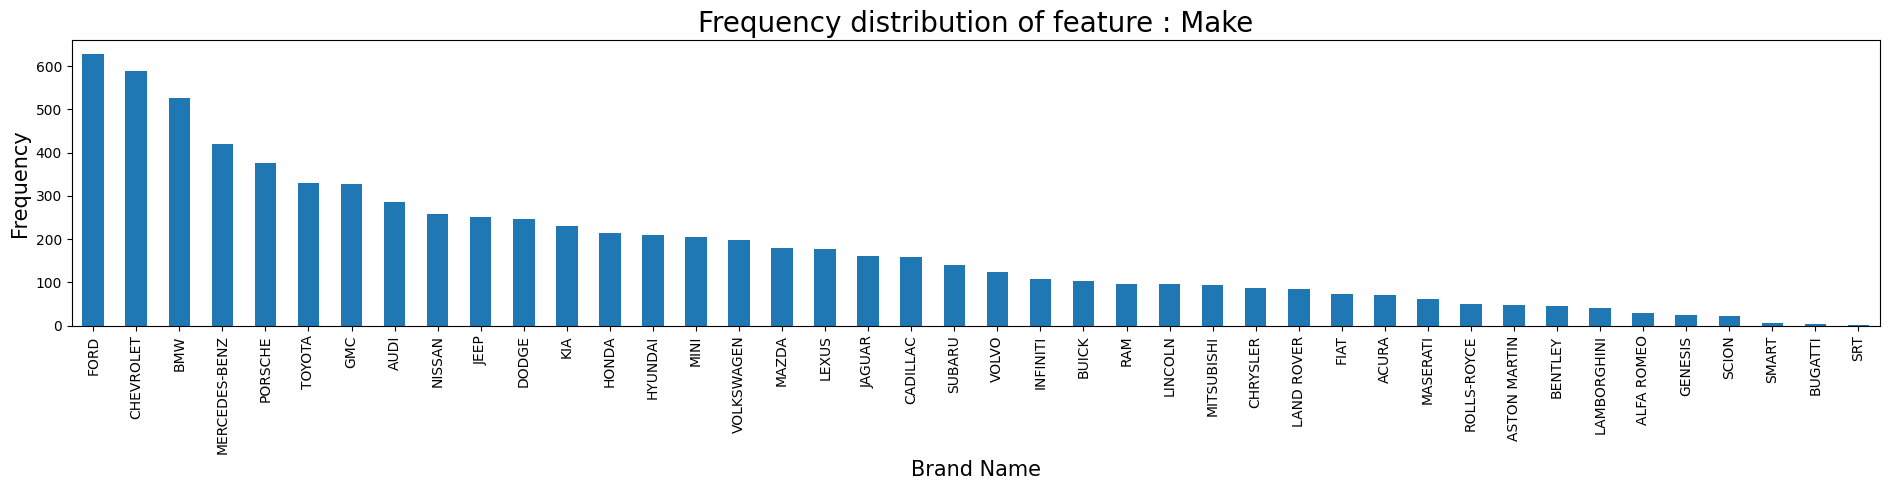

In [32]:
plt.figure(figsize=(19,5));
fuel_con.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()         #automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

#### 2. Feature : Model
#### Working with only the Top 20 model.

Total Car models: 2053 car models
Top 20 car models out of total
-------------  --
F-150 FFV 4X4  32
F-150 FFV      32
MUSTANG        27
FOCUS FFV      24
SONIC          20
SONIC 5        20
F-150 4X4      20
F-150          20
ACCORD         19
COMPASS        19
JETTA          19
ATS            19
TACOMA 4WD     19
SILVERADO 4WD  18
FORTE 5        18
SILVERADO      18
CAMARO         18
SIERRA 4WD     18
COROLLA        18
SIERRA         18
-------------  --


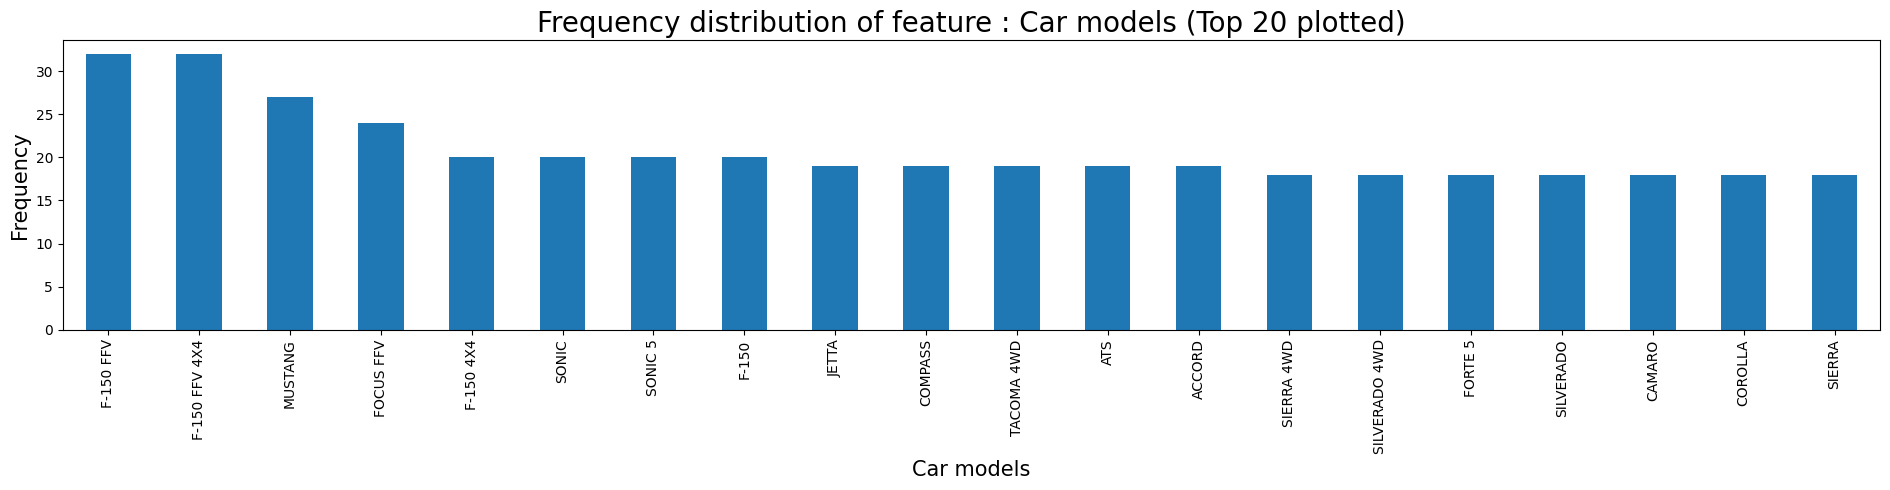

In [33]:
print(f"Total Car models: {fuel_con.Model.nunique()} car models")
print('Top 20 car models out of total')
print(tabulate(pd.DataFrame(fuel_con.Model.value_counts().sort_values(ascending=False)[:20])))

plt.figure(figsize=(19,5));
fuel_con.groupby("Model")["Model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 3. Feature : Vehicle Class

Vehicle Class
------------------------  ----
SUV - SMALL               1217
MID-SIZE                  1133
COMPACT                   1022
SUV - STANDARD             735
FULL-SIZE                  639
SUBCOMPACT                 606
PICKUP TRUCK - STANDARD    538
TWO-SEATER                 460
MINICOMPACT                326
STATION WAGON - SMALL      252
PICKUP TRUCK - SMALL       159
MINIVAN                     80
SPECIAL PURPOSE VEHICLE     77
VAN - PASSENGER             66
STATION WAGON - MID-SIZE    53
VAN - CARGO                 22
------------------------  ----


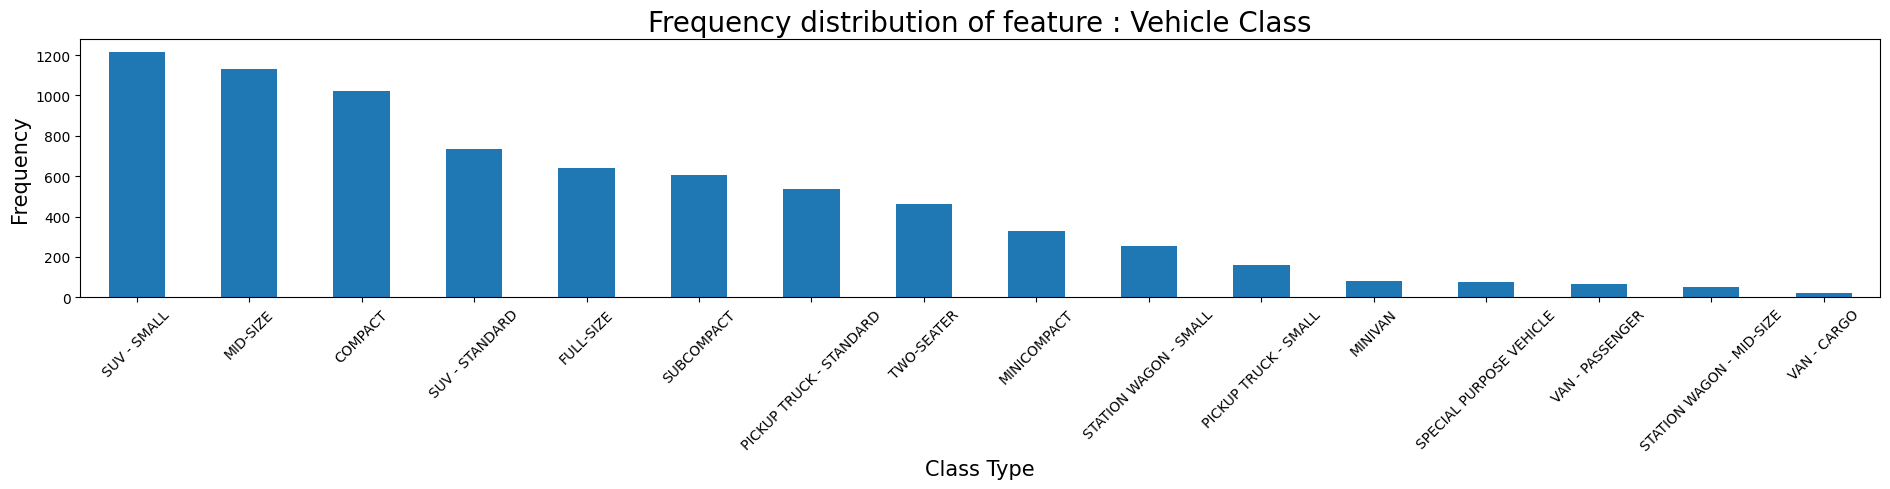

In [34]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(fuel_con["Vehicle Class"].value_counts())))
#print(pd.DataFrame(fuel_con["Vehicle Class"].value_counts()))  # or we could write like this also

plt.figure(figsize=(19,5));
fuel_con.groupby("Vehicle Class")["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Feature : Transmission

In [35]:
#rough
data= pd.DataFrame(fuel_con.groupby("Transmission")["Transmission"].count().sort_values(ascending=False))
print(tabulate(data))



---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


In [36]:
print("Transmission")
print(tabulate(pd.DataFrame(fuel_con.Transmission.value_counts())))

Transmission
---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


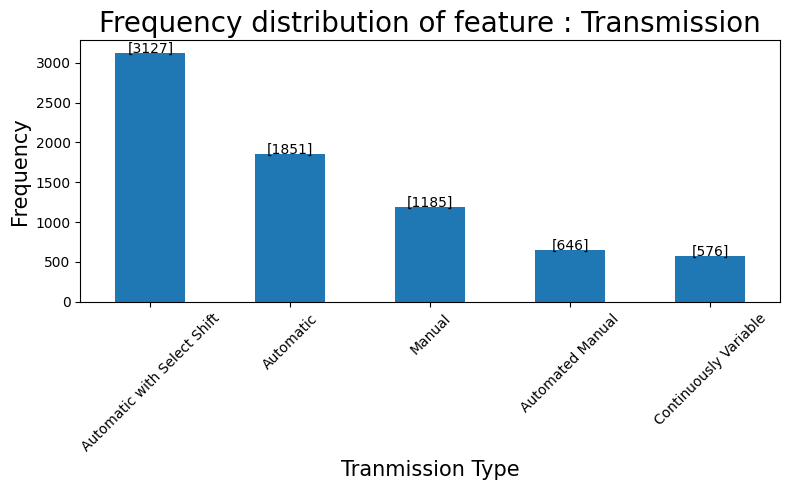

In [37]:
#if we want to add values of feature category then...
data= pd.DataFrame(fuel_con.groupby("Transmission")["Transmission"].count().sort_values(ascending=False))
print(tabulate(data))

plt.figure(figsize=(8,5));
fuel_con.groupby("Transmission")["Transmission"].count().sort_values(ascending=False).plot(kind="bar")

def addlabels(x,y):
    for i in range(len(data)):
      plt.text(i,y[i],y[i], ha='center')

addlabels(data.index,data.values)
plt.title("Frequency distribution of feature : Transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5. Feature : Fuel Type

Fuel Type
----------------  ----
Regular Gasoline  3637
Premium Gasoline  3202
Ethanol(E85)       370
Diesel             175
Natural Gas          1
----------------  ----


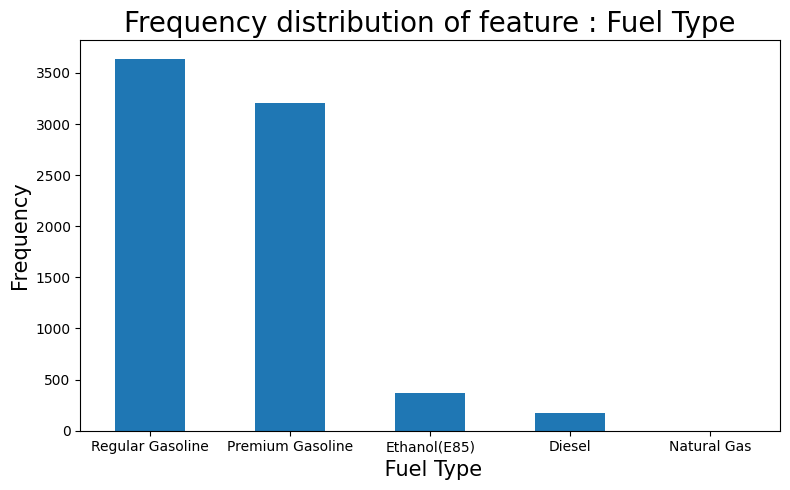

In [70]:
print("Fuel Type")
print(tabulate(pd.DataFrame(fuel_con["Fuel Type"].value_counts())))

plt.figure(figsize=(8,5));
fuel_con.groupby("Fuel Type")["Fuel Type"].count().sort_values(ascending=False).plot(kind="bar")

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


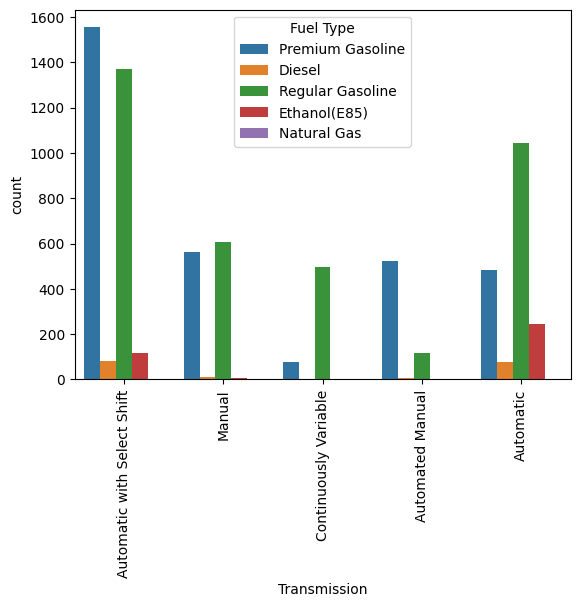

In [40]:
sns.countplot(data=fuel_con,x='Transmission',hue='Fuel Type')
plt.xticks(rotation=90)
plt.show()

1. Out of the 42 car brands Ford(628) and Chevrolet(588) are the most dominating ones. Whereas cars of Smart(7), Bugati(3) and SRT(2) are the ones with lowest frequency.
2. SUV-Small(1217) and MID-Size(1133) vehicles are the most frequent ones on Canadian roads.
3. Frequency of car with Transmission type Automatic with Select Shift(3127) is the highest and with Continuously Variable Transmission(576) is the lowest.
4. Car which runs on Gasoline let it be Regular(3637) or Premium(3202) is the most common vehicle type. And cars running on Diesel(175) are very low in frquency and there is only one sample which uses Natural Gases.

## Variation in CO2 emissions with different features

#### 1. Feature : Make

In [41]:
CO2_make = fuel_con.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
com = CO2_make[CO2_make['CO2 Emissions(g/km)']>200]
com

,Make,CO2 Emissions(g/km)
5,SCION,200.454545
6,MITSUBISHI,200.505263
7,HYUNDAI,208.871429
8,VOLKSWAGEN,209.335025
9,KIA,214.294372
10,SUBARU,217.614286
11,ACURA,223.652778
12,TOYOTA,224.424242
13,ALFA ROMEO,224.900000
14,VOLVO,230.056452


Text(0, 0.5, 'CO2 Emissions(g/km)')

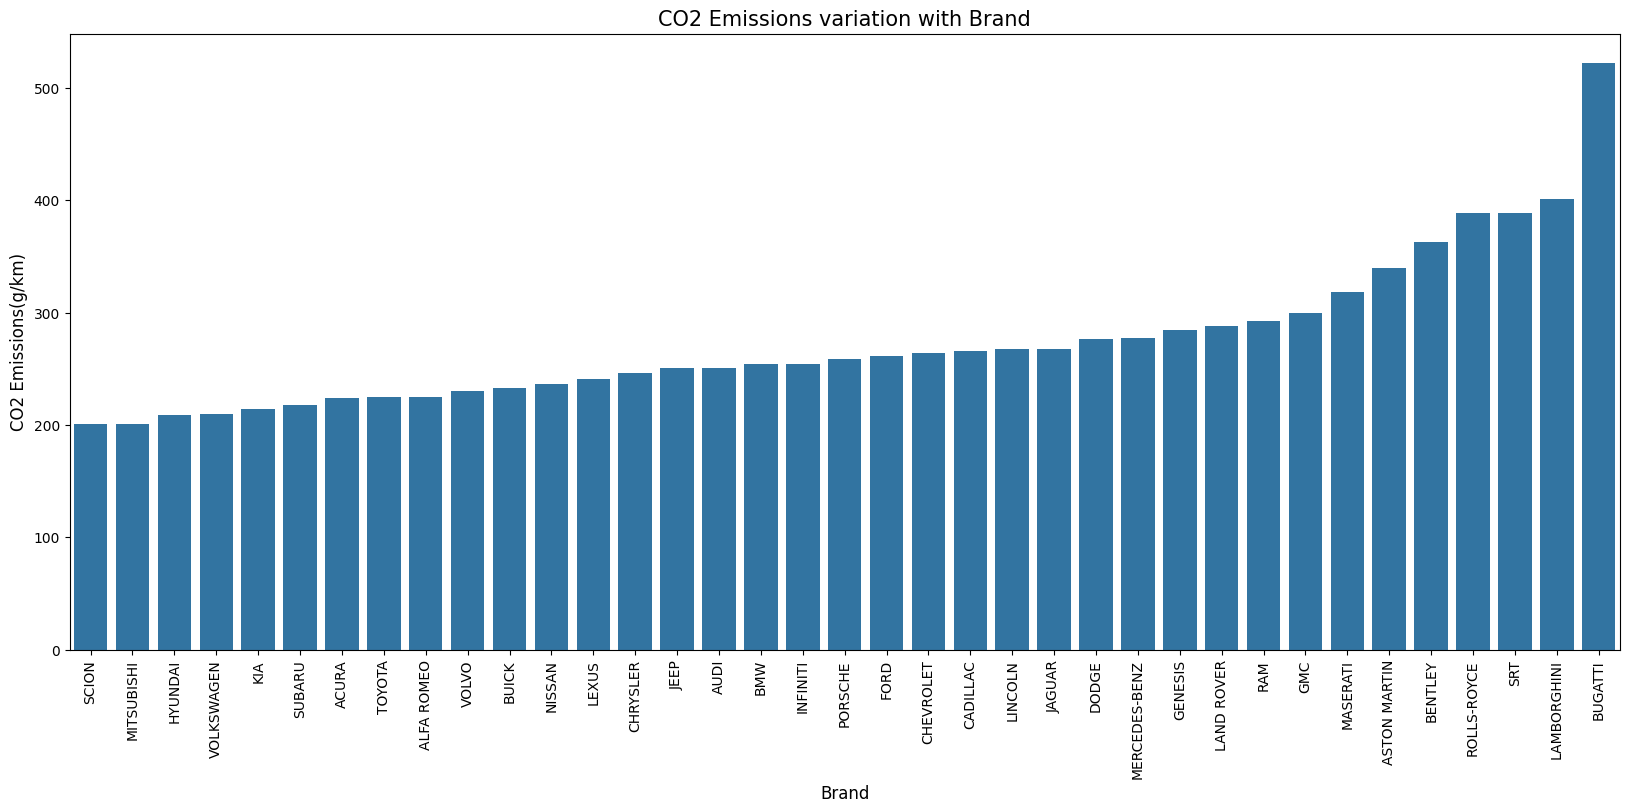

In [42]:
plt.figure(figsize=(20,8))
sns.barplot(x = "Make",y="CO2 Emissions(g/km)",data = com)

plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [43]:
#rough
order = fuel_con.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True)
order

Make
SMART            150.0
HONDA            179.5
FIAT             187.0
MAZDA            188.0
MINI             197.0
VOLKSWAGEN       201.0
HYUNDAI          202.0
MITSUBISHI       204.0
SCION            207.0
KIA              208.0
SUBARU           213.5
ALFA ROMEO       217.0
TOYOTA           217.5
NISSAN           225.0
VOLVO            227.5
ACURA            228.0
BUICK            228.0
JEEP             235.0
AUDI             241.0
BMW              242.0
CHRYSLER         244.5
LEXUS            248.5
PORSCHE          253.0
INFINITI         254.5
CADILLAC         260.0
FORD             263.0
MERCEDES-BENZ    271.0
CHEVROLET        274.0
DODGE            274.0
JAGUAR           276.5
LINCOLN          278.0
GENESIS          282.0
LAND ROVER       283.0
RAM              289.0
GMC              299.0
MASERATI         302.0
ASTON MARTIN     343.0
BENTLEY          369.0
LAMBORGHINI      384.0
SRT              389.0
ROLLS-ROYCE      391.5
BUGATTI          522.0
Name: CO2 Emissions(g/km), dt

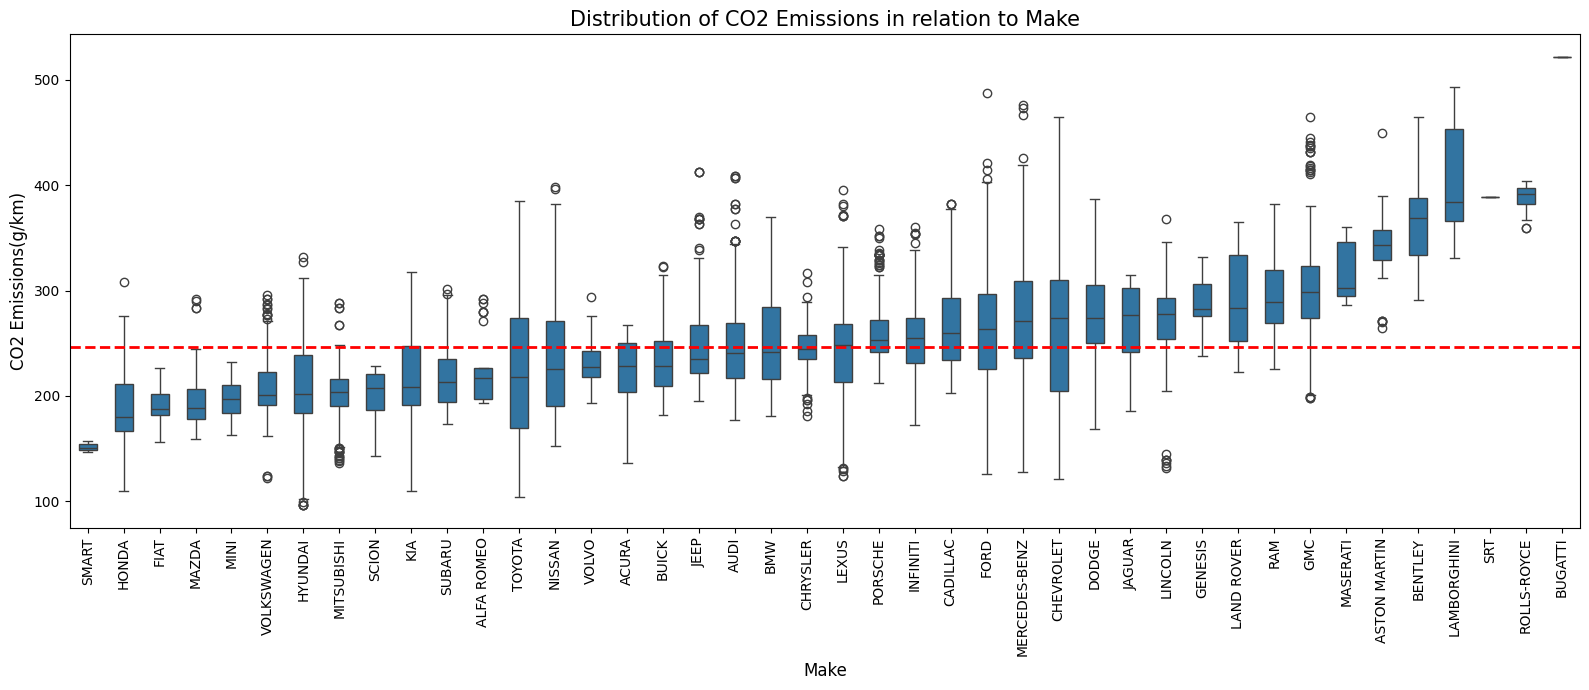

In [44]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

 1. From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to the brand Bugatti is the highest and cars of SMART has the lowest emissions.
 2. The red line signify the sample mean of CO2 emissions.
 3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

#### 2. Feature : Vehicle Class

Text(0, 0.5, 'CO2 Emissions(g/km)')

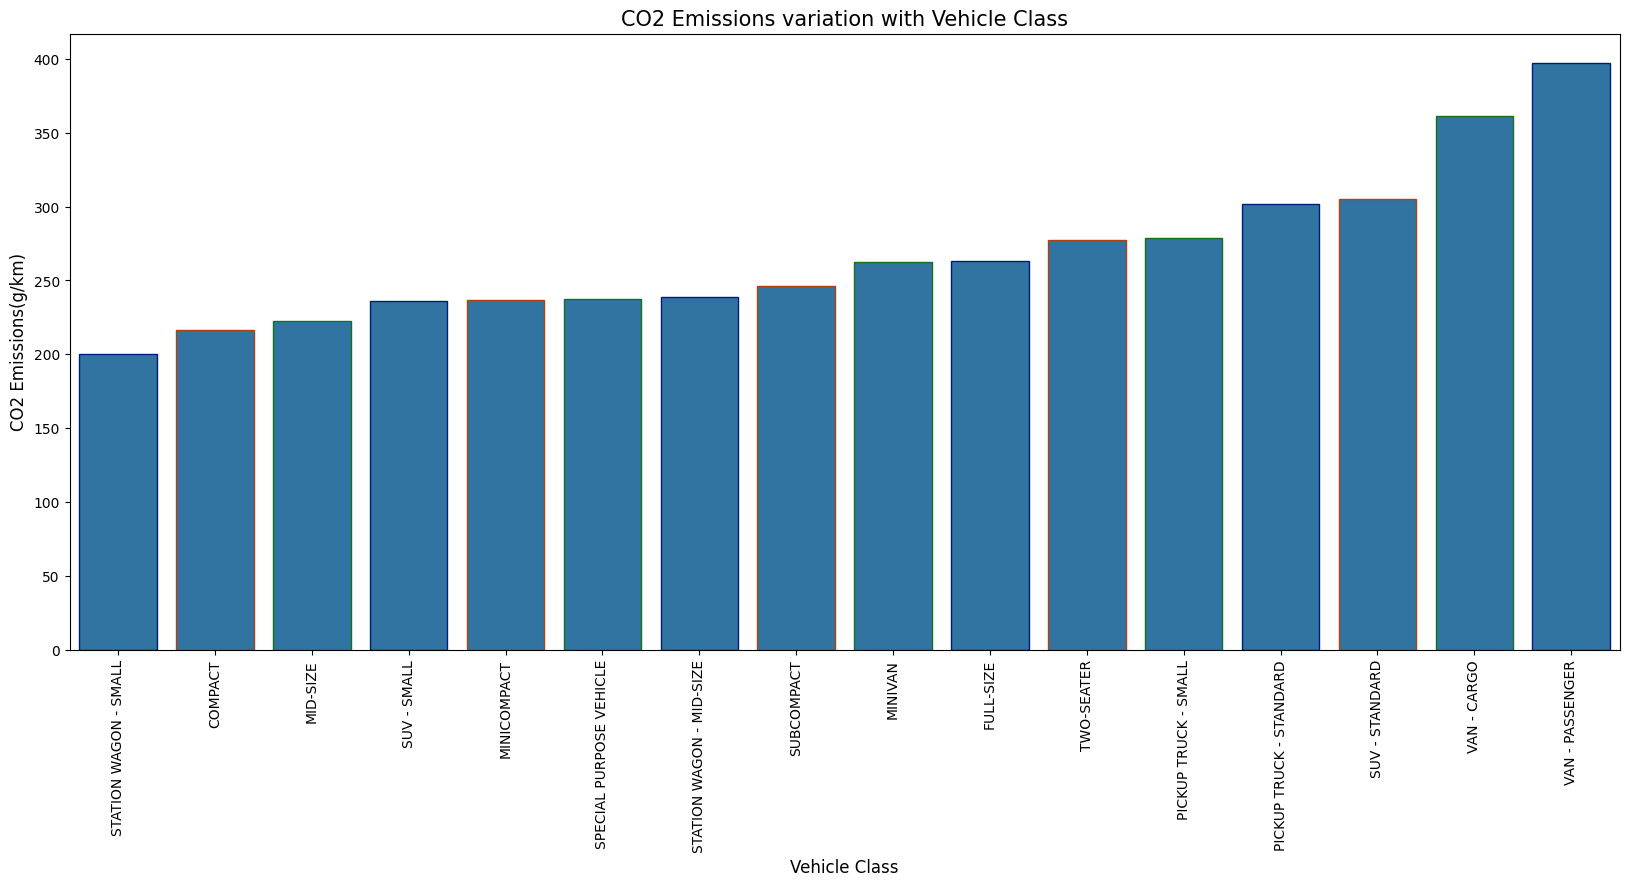

In [45]:
CO2_class = fuel_con.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Vehicle Class",y="CO2 Emissions(g/km)",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

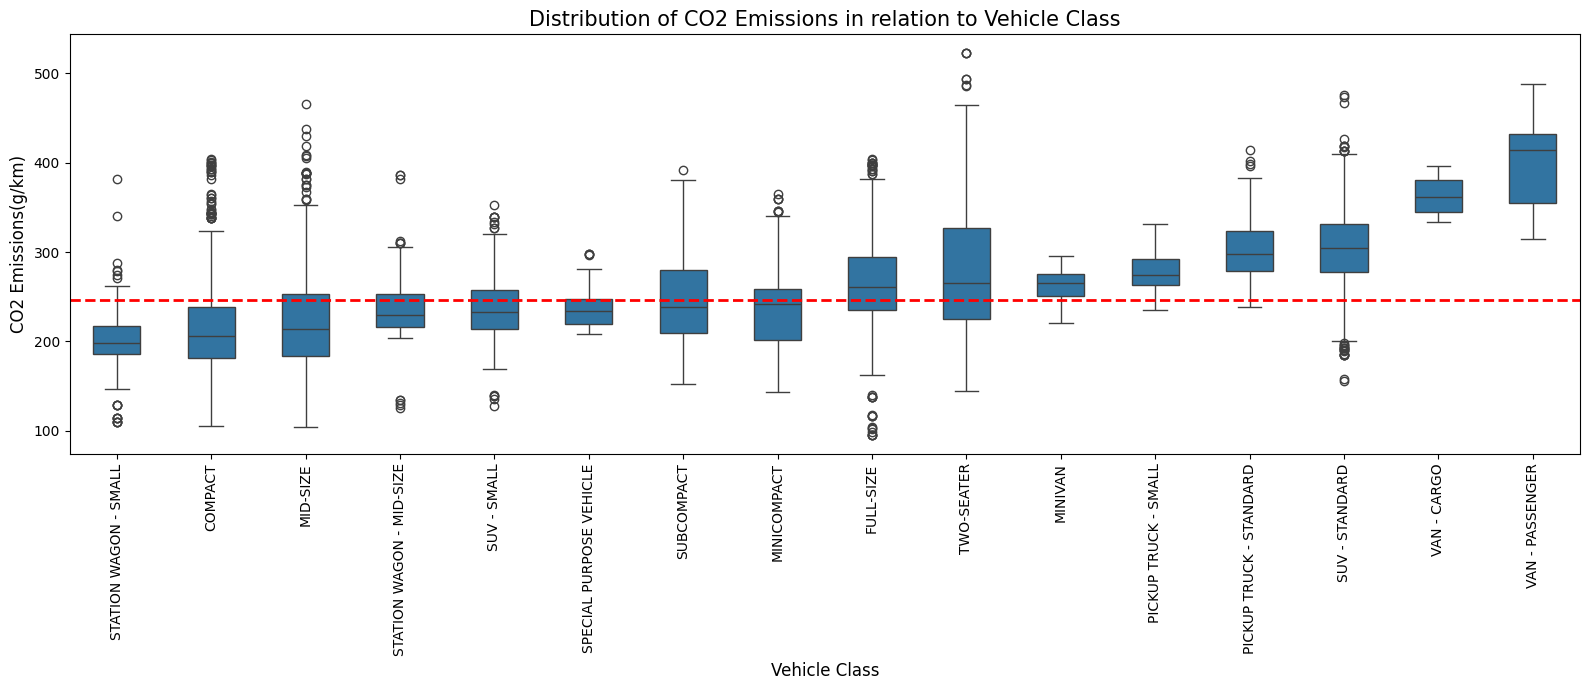

In [46]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

 1. The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest CO2 emissions among all. And Station Wagon-Small has the lowest CO2 emissions.
 2. There are 8 types of vehicle class out of 16 which has a median CO2 emissions less than sample median of CO2 emissions and the other 8 has a higher median.

#### 3. Feature : Transmission

---------------------------  -------
Continuously Variable        184.311
Manual                       228.346
Automated Manual             249.728
Automatic with Select Shift  255.393
Automatic                    277.622
---------------------------  -------


Text(0, 0.5, 'CO2 Emissions(g/km)')

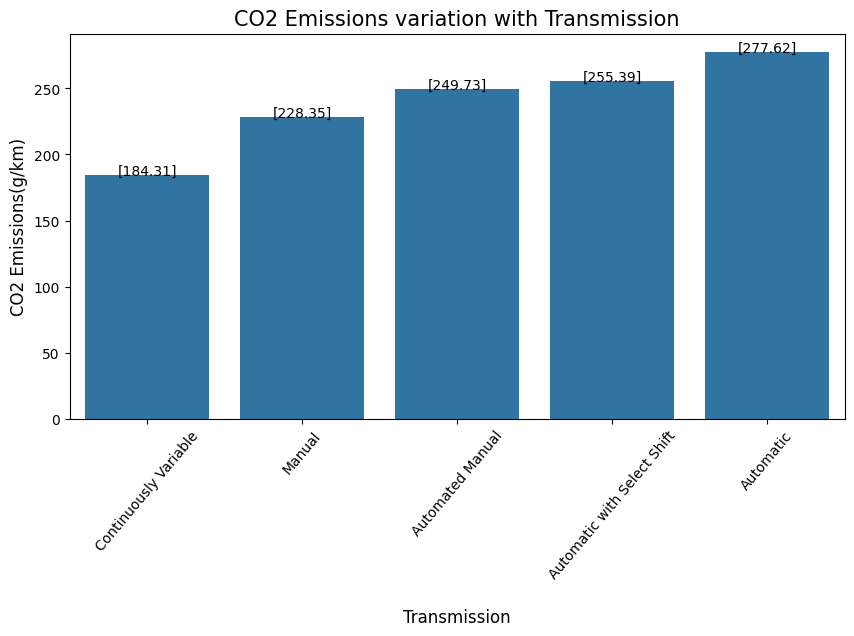

In [47]:
#rough
CO2_transmissio = fuel_con.groupby(["Transmission"])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
CO2_transmissio.set_index('Transmission',inplace=True)
print(tabulate(CO2_transmissio))

def addlabel(x,y):
  for i in range(len(CO2_transmissio)):
    plt.text(i,y[i],y[i].round(2),ha='center')

plt.figure(figsize=(10,5))
sns.barplot(x = "Transmission",y="CO2 Emissions(g/km)", data = CO2_transmissio)

addlabel(CO2_transmissio.index,CO2_transmissio.values)


plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks( rotation = 50,horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

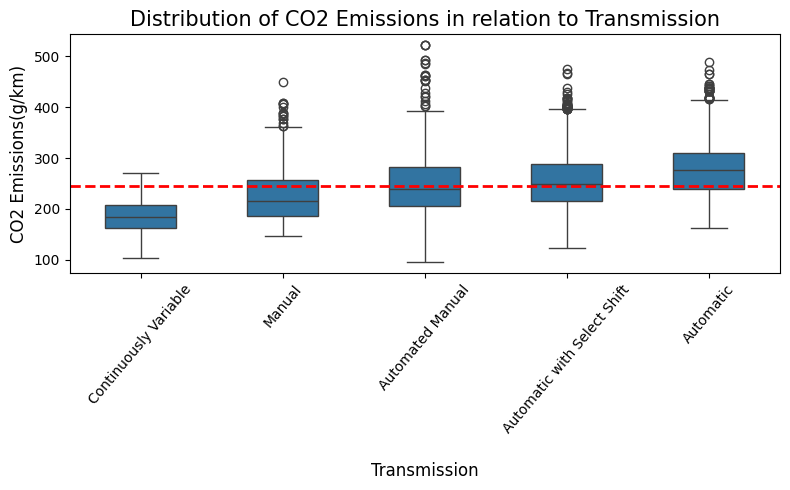

In [48]:
plt.figure(figsize=(8,5))
order = fuel_con.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.xticks(rotation=50)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

 1. Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions
 2. Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.

#### 4. Feature : Fuel Type

Text(0, 0.5, 'CO2 Emissions(g/km)')

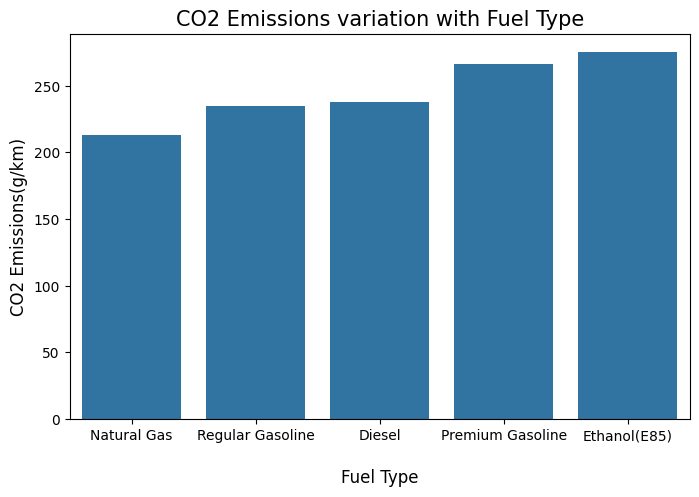

In [49]:
CO2_fuel_type = fuel_con.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x = "Fuel Type",y="CO2 Emissions(g/km)",data = CO2_fuel_type)
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

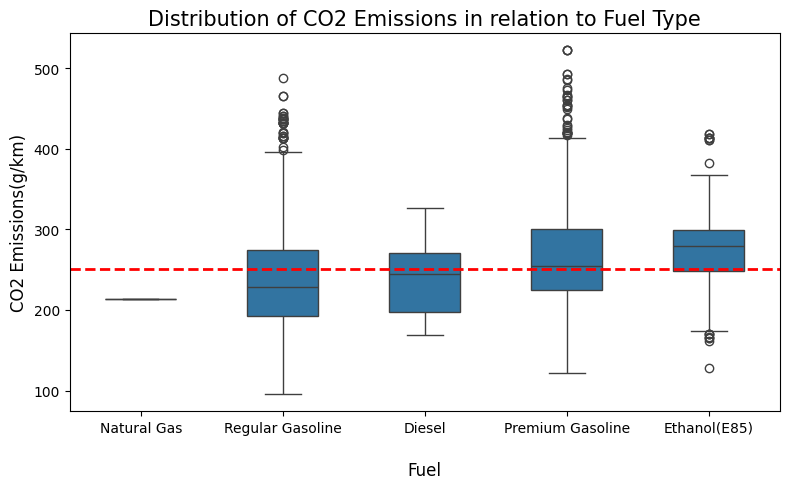

In [50]:
plt.figure(figsize=(8,5))
order = fuel_con.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

 1. Cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values higher than the sample median CO2 emissions.
 2. Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.
 3. The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median.

## Analysing the Numerical Values

```
# This is formatted as code
```



### Descriptive Statistics

In [51]:
stats_ = fuel_con.describe().T.drop(["count"], axis=1)
stats_

,mean,std,min,25%,50%,75%,max
Engine Size(L),3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [52]:
fuel_con.skew()

Engine Size(L)                      0.809181
Cylinders                           1.110415
Fuel Consumption City (L/100 km)    0.809005
Fuel Consumption Hwy (L/100 km)     1.079217
Fuel Consumption Comb (L/100 km)    0.893316
Fuel Consumption Comb (mpg)         0.977034
CO2 Emissions(g/km)                 0.526094
dtype: float64

In [53]:
#altternative ways to add skew column in stat
stats2 = stats_.copy()
stats2['skew'] = fuel_con.skew()

In [54]:
stats2

,mean,std,min,25%,50%,75%,max,skew
Engine Size(L),3.160068,1.354170,0.9,2.0,3.0,3.7,8.4,0.809181
Cylinders,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0,1.110415
Fuel Consumption City (L/100 km),12.556534,3.500274,4.2,10.1,12.1,14.6,30.6,0.809005
Fuel Consumption Hwy (L/100 km),9.041706,2.224456,4.0,7.5,8.7,10.2,20.6,1.079217
Fuel Consumption Comb (L/100 km),10.975071,2.892506,4.1,8.9,10.6,12.6,26.1,0.893316
Fuel Consumption Comb (mpg),27.481652,7.231879,11.0,22.0,27.0,32.0,69.0,0.977034
CO2 Emissions(g/km),250.584699,58.512679,96.0,208.0,246.0,288.0,522.0,0.526094


In [55]:
stats_ = pd.concat([stats_, fuel_con.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".2f"))

                                    mean     25%    median     75%    std    skew    min     max
--------------------------------  ------  ------  --------  ------  -----  ------  -----  ------
Engine Size(L)                      3.16    2.00      3.00    3.70   1.35    0.81   0.90    8.40
Cylinders                           5.62    4.00      6.00    6.00   1.83    1.11   3.00   16.00
Fuel Consumption City (L/100 km)   12.56   10.10     12.10   14.60   3.50    0.81   4.20   30.60
Fuel Consumption Hwy (L/100 km)     9.04    7.50      8.70   10.20   2.22    1.08   4.00   20.60
Fuel Consumption Comb (L/100 km)   10.98    8.90     10.60   12.60   2.89    0.89   4.10   26.10
Fuel Consumption Comb (mpg)        27.48   22.00     27.00   32.00   7.23    0.98  11.00   69.00
CO2 Emissions(g/km)               250.58  208.00    246.00  288.00  58.51    0.53  96.00  522.00


1. The range of our target CO2 Emissions is between 96 and 522.
2. Mean CO2 emissions is 250.58 and median is 246.
3. 25% of the sample points has CO2 emissions within 208 and 75% has within 288.
4. All the features are positively skewed.
5. Cylinders and Fuel Consumption Hwy (L/100 km) seems significantly more skewed than the other features.
6. CO2 Emissions(g/km) is the least skewed feature.
7. Other than the regressor feature, among the predictors Engine Size(L) and Fuel Consumption City (L/100 km) are the least skewed features.

### To check the shape of the distribution and skewness of each feature

In [56]:
#rough
float(stats_.iloc[0:1,5].values.round(3))

0.809

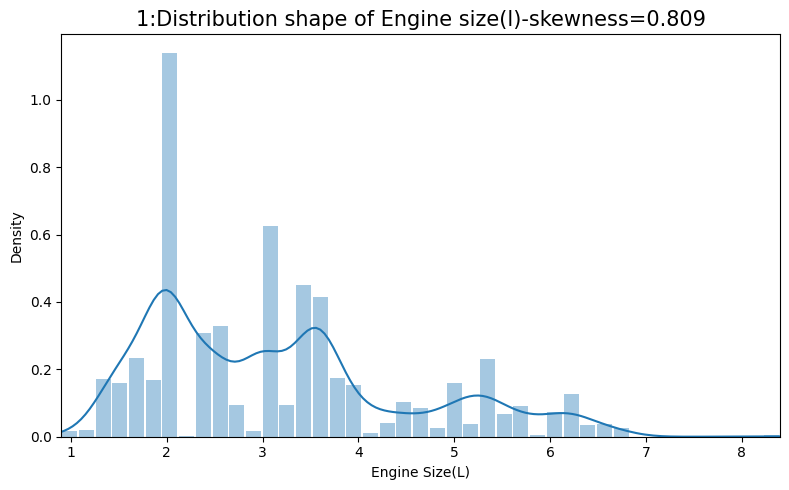

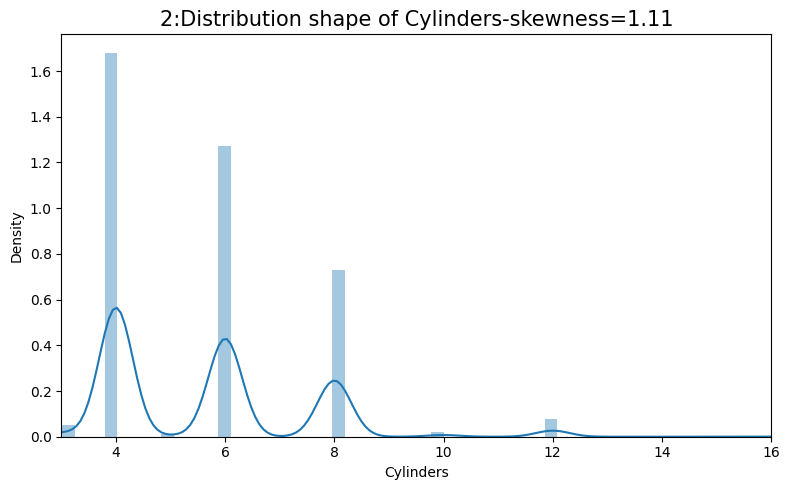

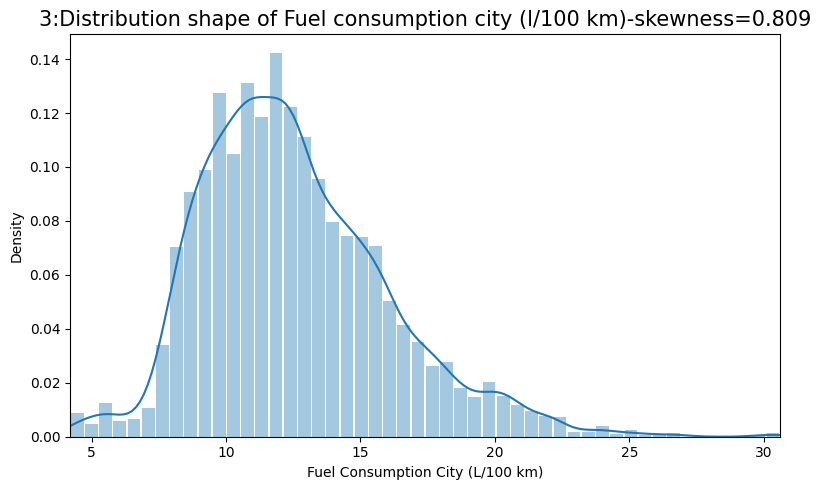

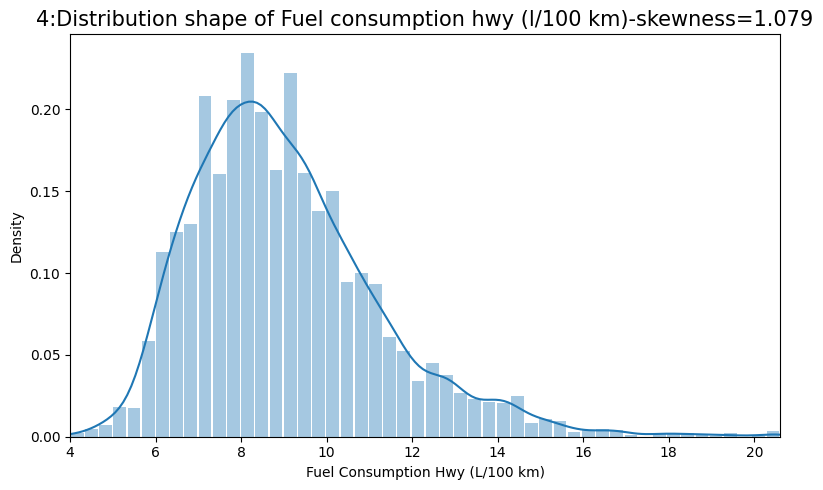

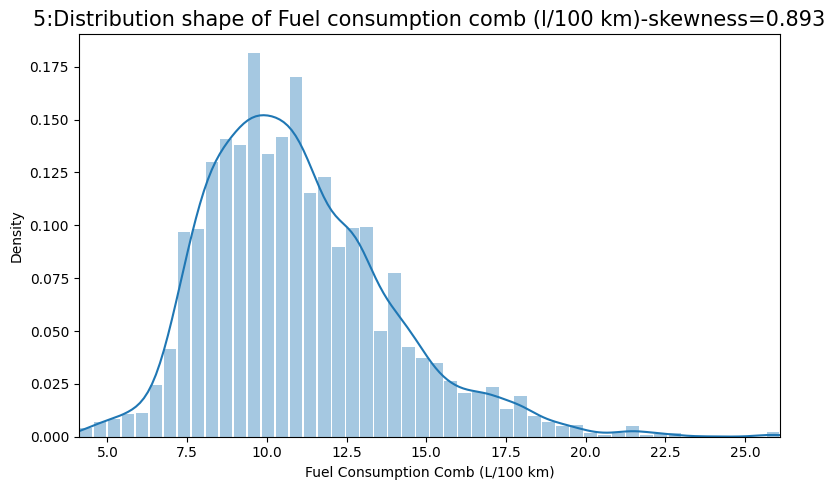

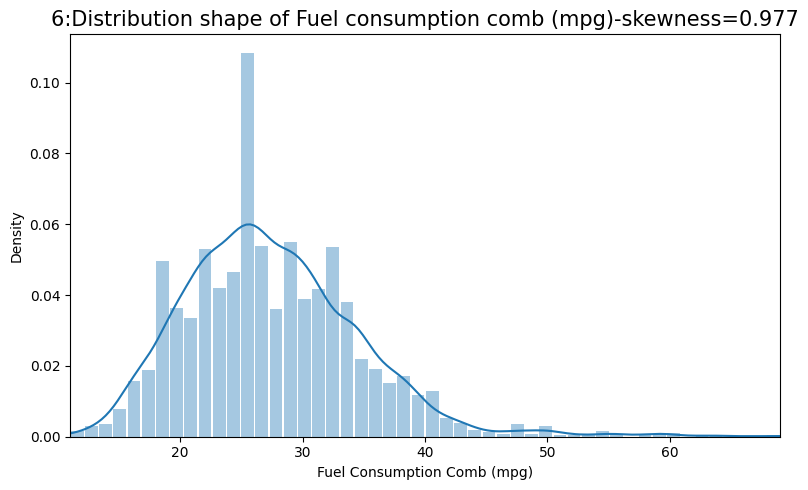

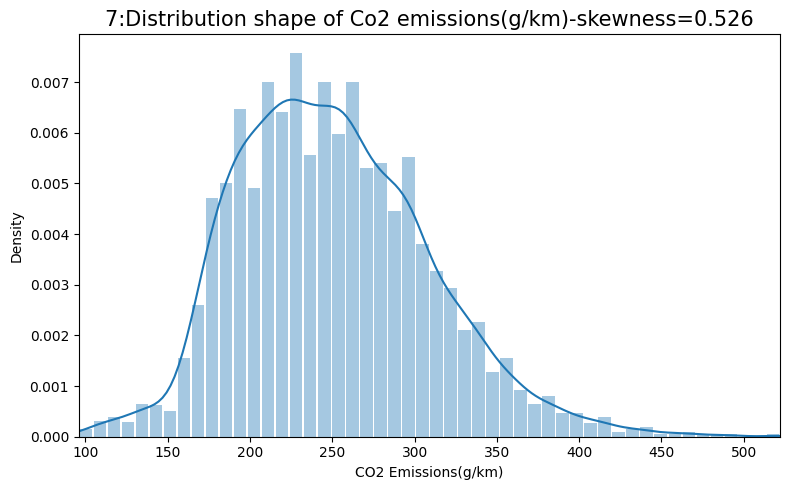

In [57]:
for feature,i in zip(fuel_con.select_dtypes("number"),range(len(stats_))):
    plt.figure(figsize=(8,5))
    sns.distplot(fuel_con[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(fuel_con[feature].min(), fuel_con[feature].max())
    plt.title(f"{i+1}:Distribution shape of {feature.capitalize()}-skewness={float(stats_.iloc[i:i+1,5].values.round(3))}", fontsize=15)
    plt.tight_layout()
    plt.show()

 1. Cylinder feature has discrete values so it is the most positively skewes distribution.
 2. CO2 Emission in turn is the one which looks more similar to a normally distributed curve than the others.

## To visualize the distribution of the dependent variabale using a Frequency Distribution plot and a Box plot

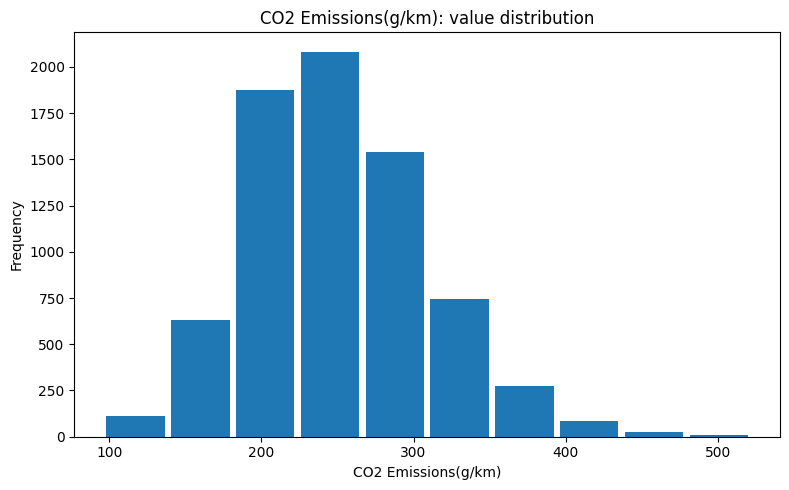

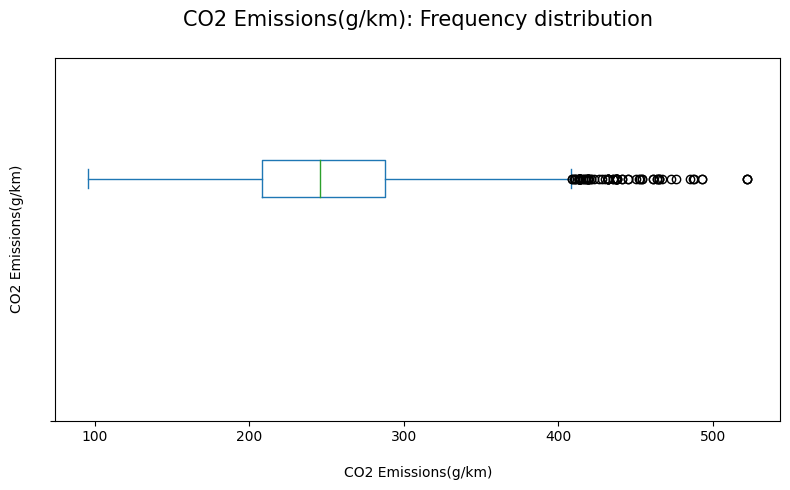

In [58]:
plt.figure(figsize=(8,5))
fuel_con["CO2 Emissions(g/km)"].plot(kind="hist", rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
fuel_con["CO2 Emissions(g/km)"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

 From the Box plot we can infer
 1. The minimum vale of the CO2 emission is around 96.
 2. The median CO2 emission is 246.
 3. The 25% of the samples have CO2 emission between 96 and 208.
 4. The 75% of the samples have CO2 emission between 96 and 288.
 5. There are no outliers in the lower half but there are outliers in the upper half.
 6. The maximum CO2 emissions observed is 522 which is an outlier.
 7. The distribution of CO2 emissions is positively skewed.

## CORRELATION MATRIX

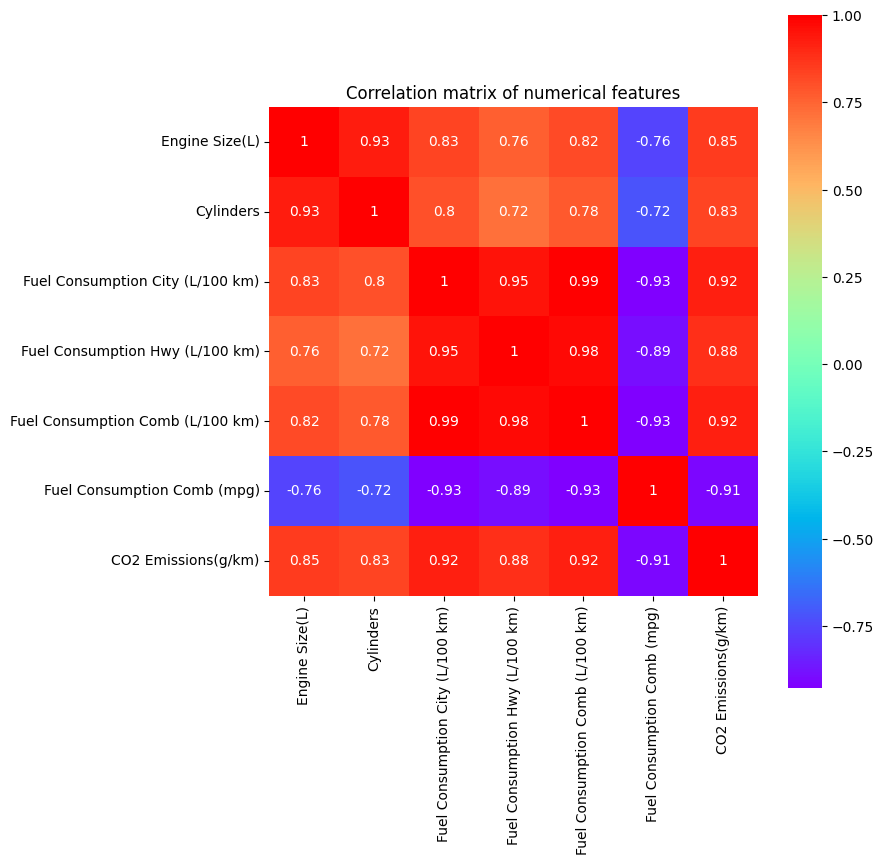

In [76]:
corr = fuel_con.corr()
plt.subplots(figsize=(9,9));
sns.heatmap(corr, annot=True, cmap="rainbow", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.
2. All the other features are postively correlated with each other.
3. Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.
4. Our dependent variable CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg).

### Correlation of independent features with dependent variable

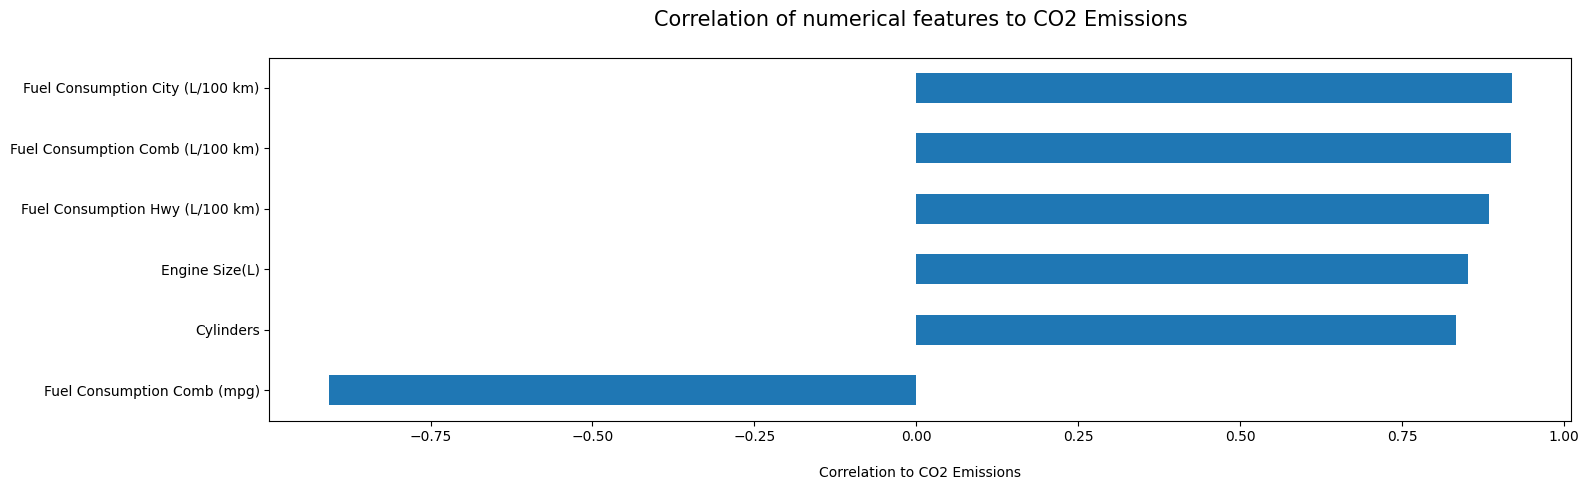

In [60]:
plt.figure(figsize=(16,5))
corr["CO2 Emissions(g/km)"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

## Variation in CO2 emissions with different features

#### ***1. Feature : Cylinders***

Text(0, 0.5, 'CO2 Emissions(g/km)')

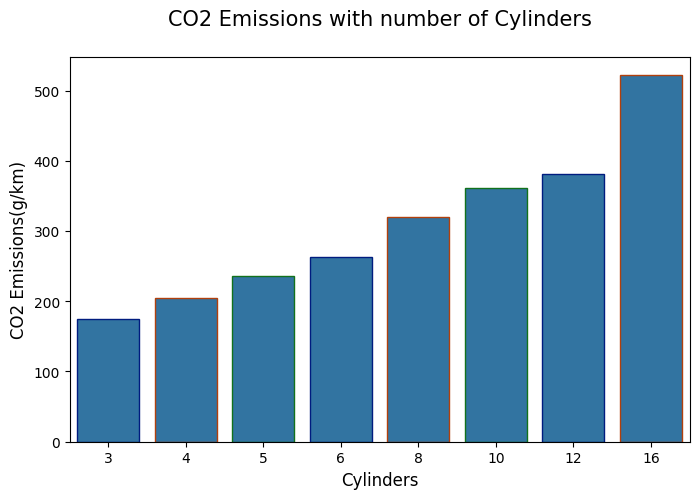

In [61]:
CO2_cylinder = fuel_con.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

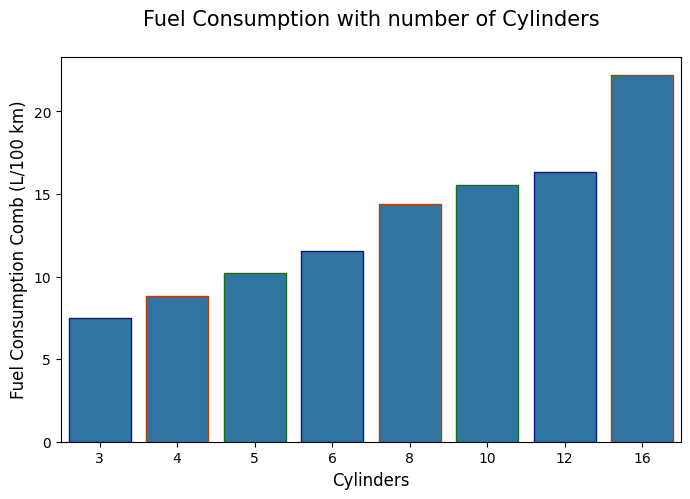

In [62]:
fuel_cylinder = fuel_con.groupby(['Cylinders'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x = "Cylinders",y="Fuel Consumption Comb (L/100 km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

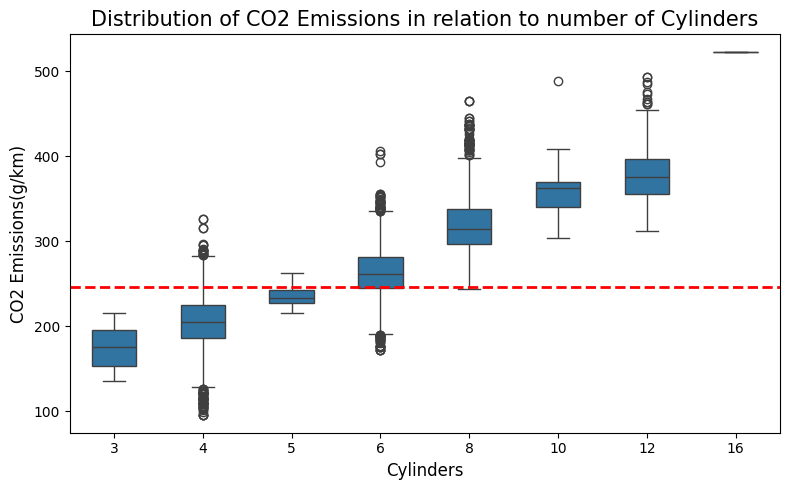

In [63]:
plt.figure(figsize=(8,5))
order = fuel_con.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

1. With increase in number of Cylinders, CO2 emissions also increase proportionally.
2. The same trend can be observed for Cylinder vs Combined Fuel Consumption. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so with increase in number of cylinders, CO2 emissions also increases.
3. Vehicles with number of cylinders more than 5 has a median CO2 emissions greater than the sample median CO2 emissions.
4. Vehicles with less than 6 cylinder have almost all the sample with median CO2 emissions less than sample median.
5. Whereas vehicles with more than 5 cylinders have almost 100% sample with median CO2 emissions more than the sample median.

#### ***2. Feature : Engine Size(L)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

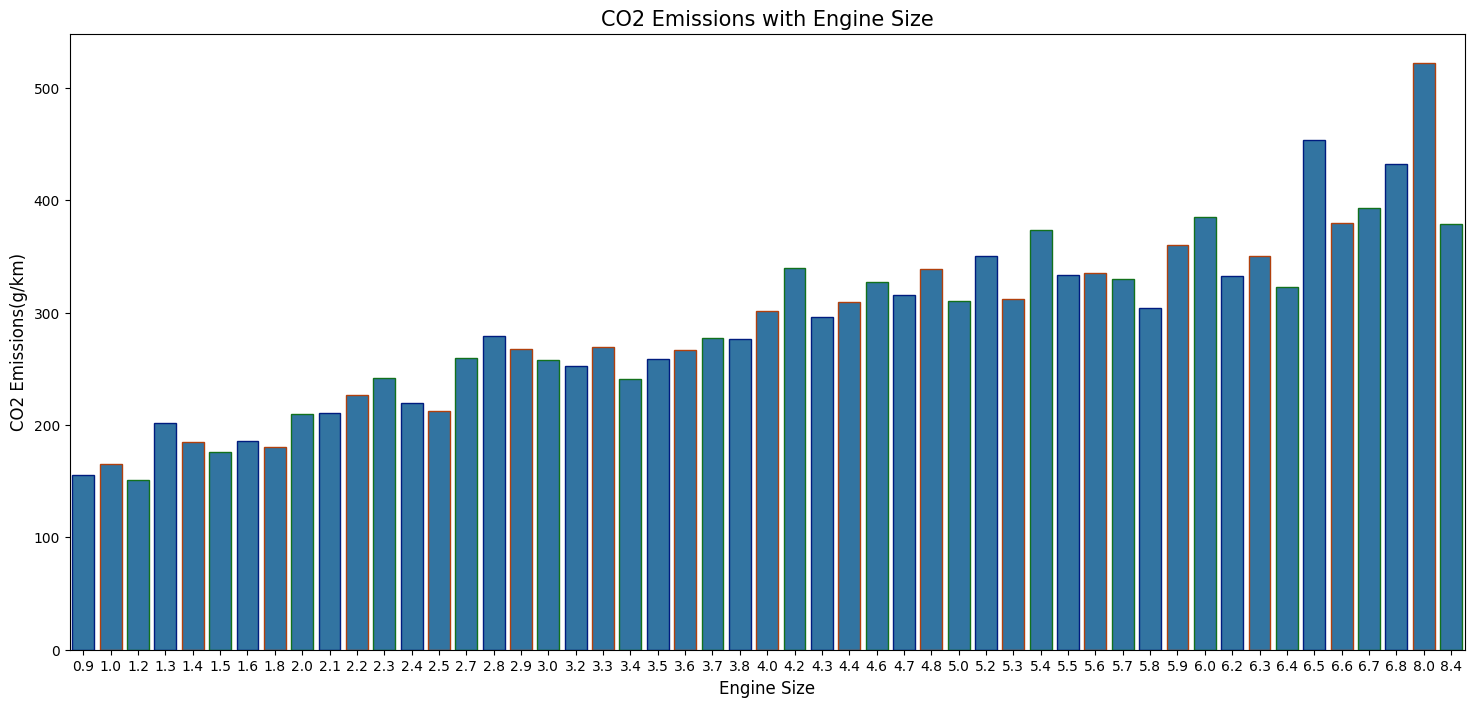

In [64]:
CO2_engine = fuel_con.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

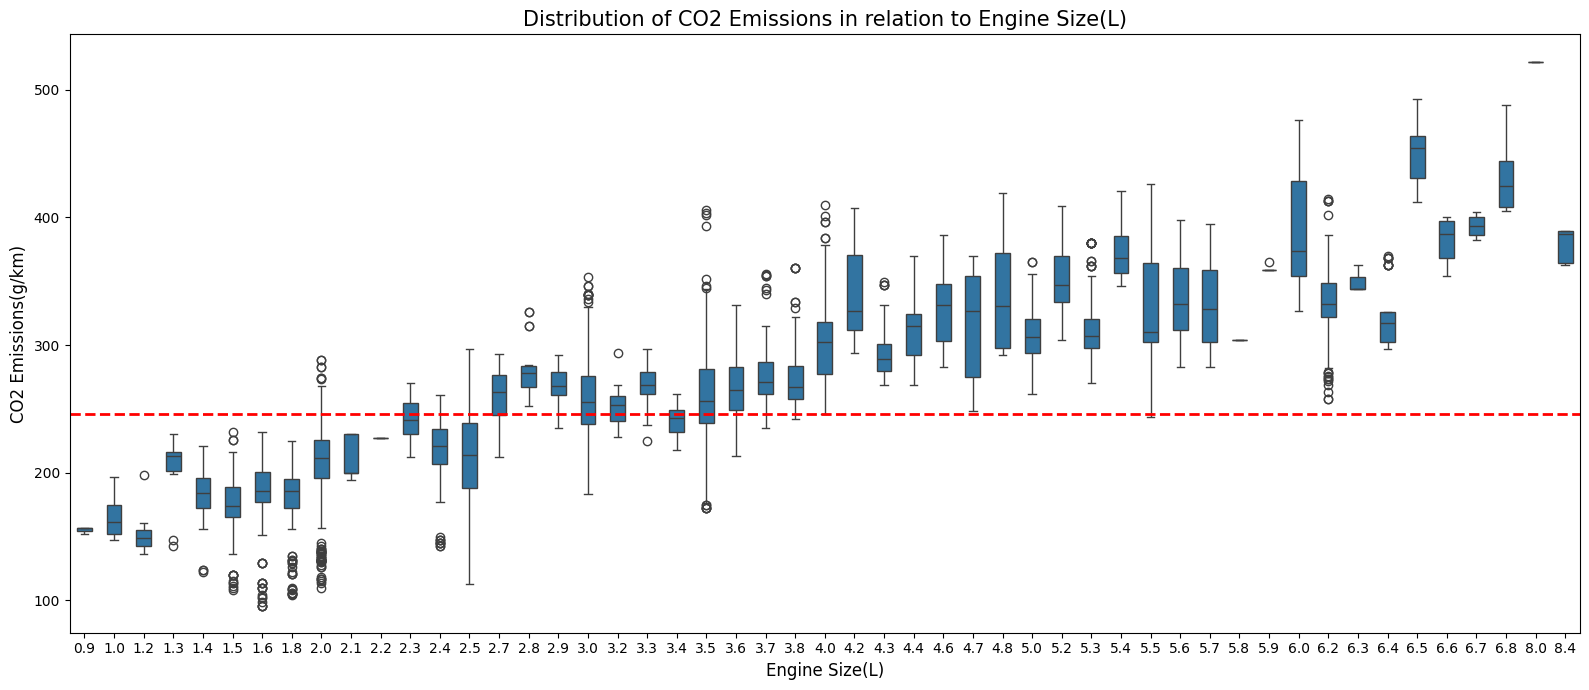

In [65]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Engine Size(L)")["CO2 Emissions(g/km)"].median().index
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

1. With increase in Engine Size, CO2 emissions also increases.
2. The same trend can be observed for Engine Size vs Combined Fuel Consumption also. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so as Engine Size increases CO2 emissions also increases.
3. Vehicles with Engines Size more than 2.5L has a median CO2 emissions greater than or equal to the sample median CO2 emissions.

#### ***3. Feature : Fuel Consumption City (L/100 km)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

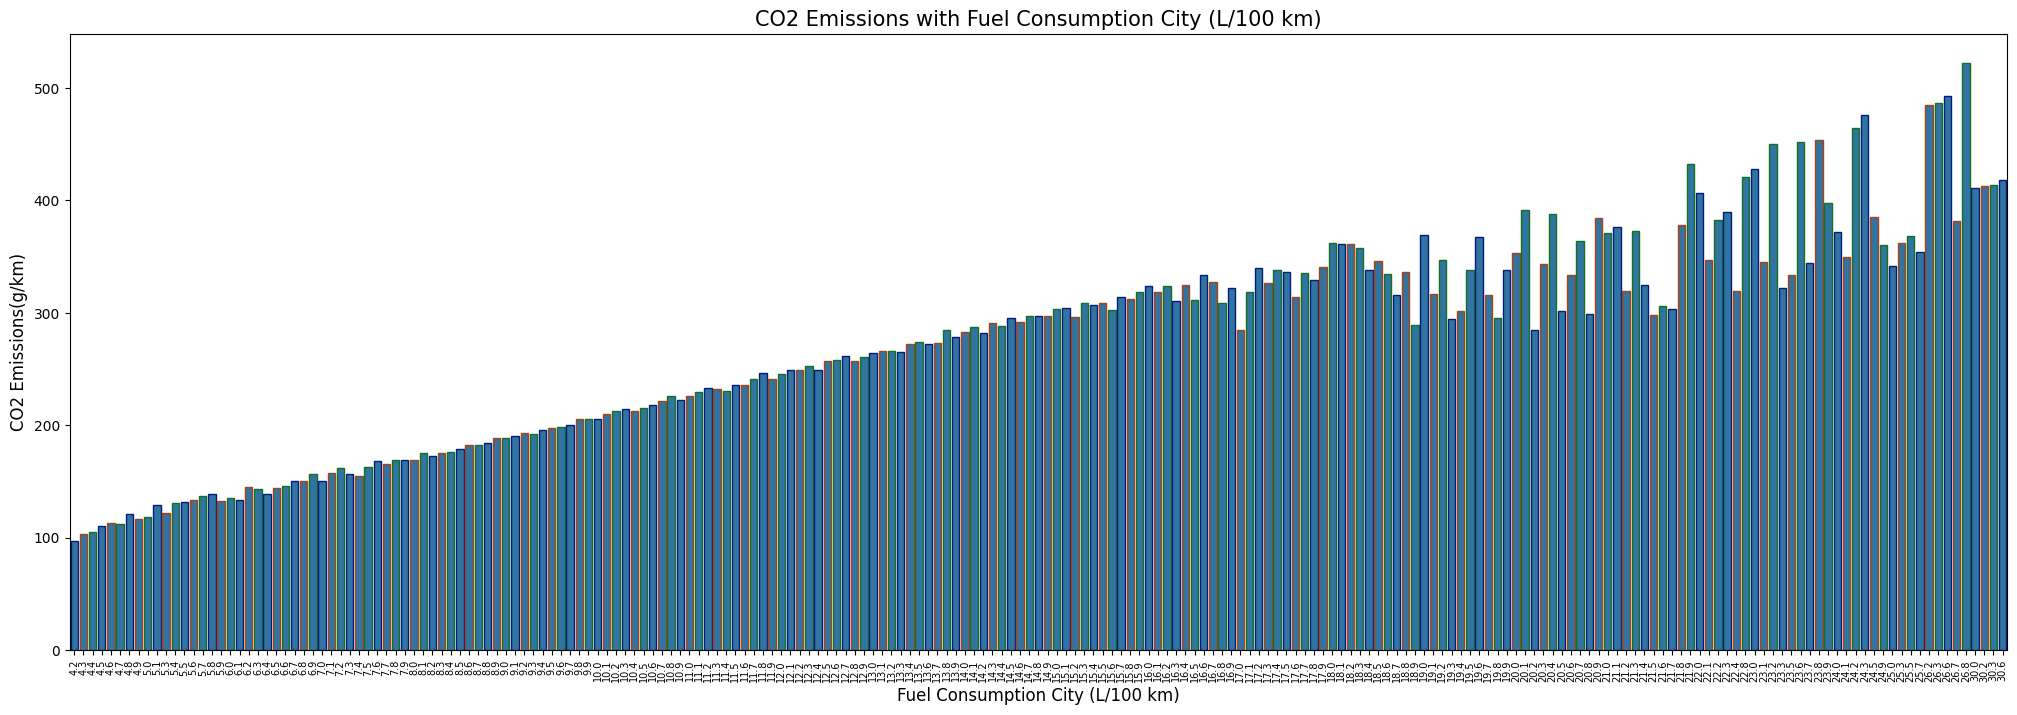

In [66]:
CO2_city = fuel_con.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

#### ***4. Feature : Fuel Consumption Hwy (L/100 km)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

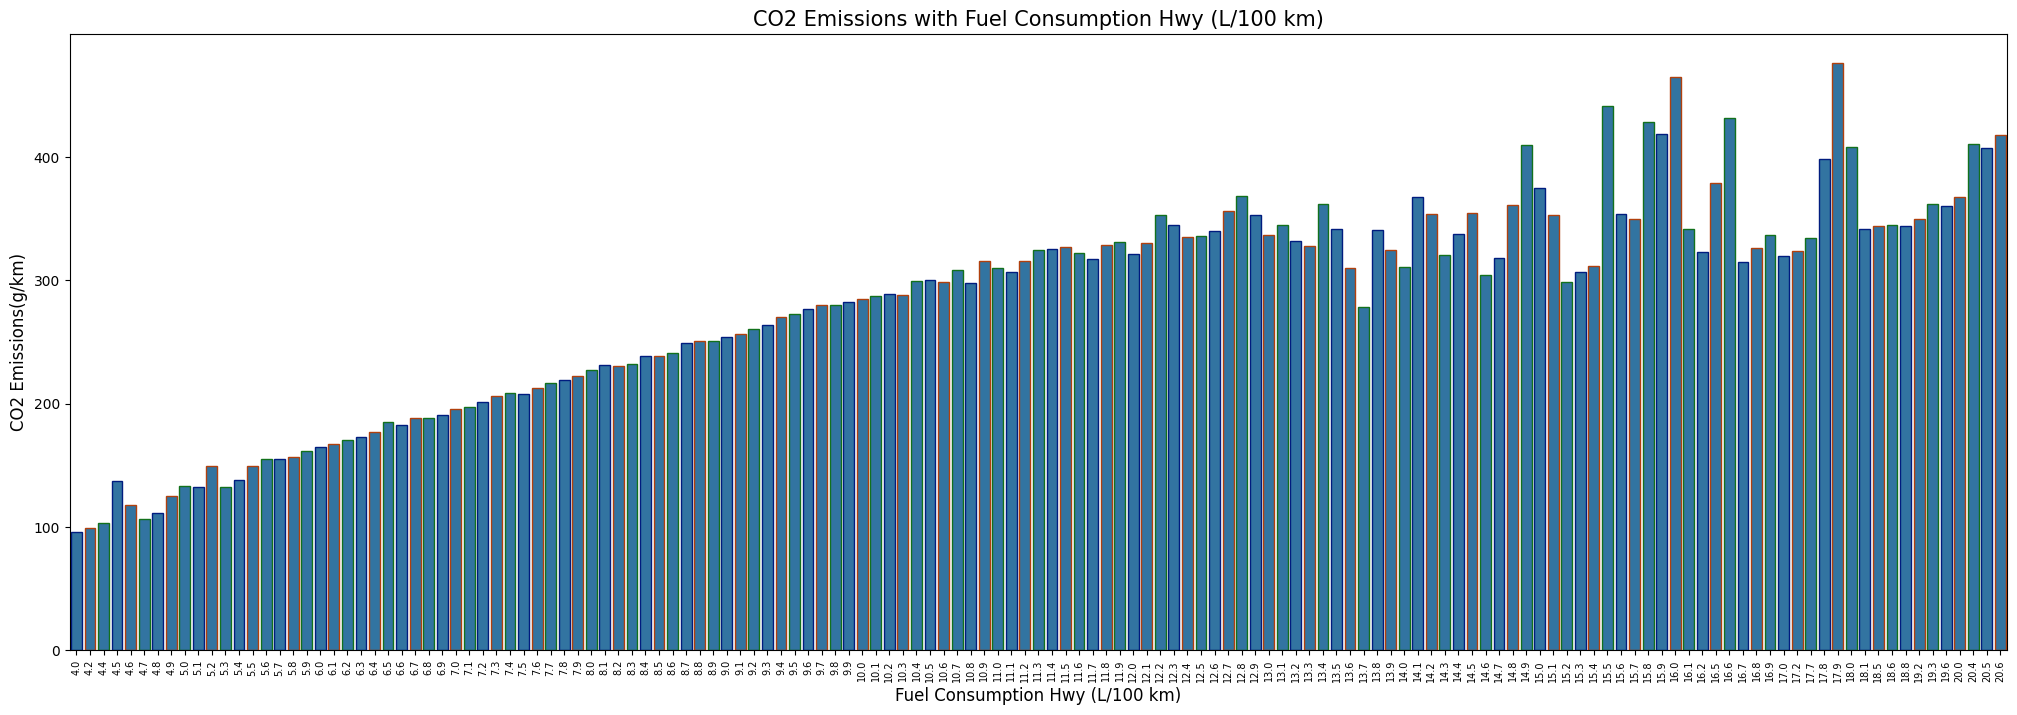

In [67]:
CO2_hwy = fuel_con.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

#### ***5. Feature : Fuel Consumption Comb (L/100 km)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

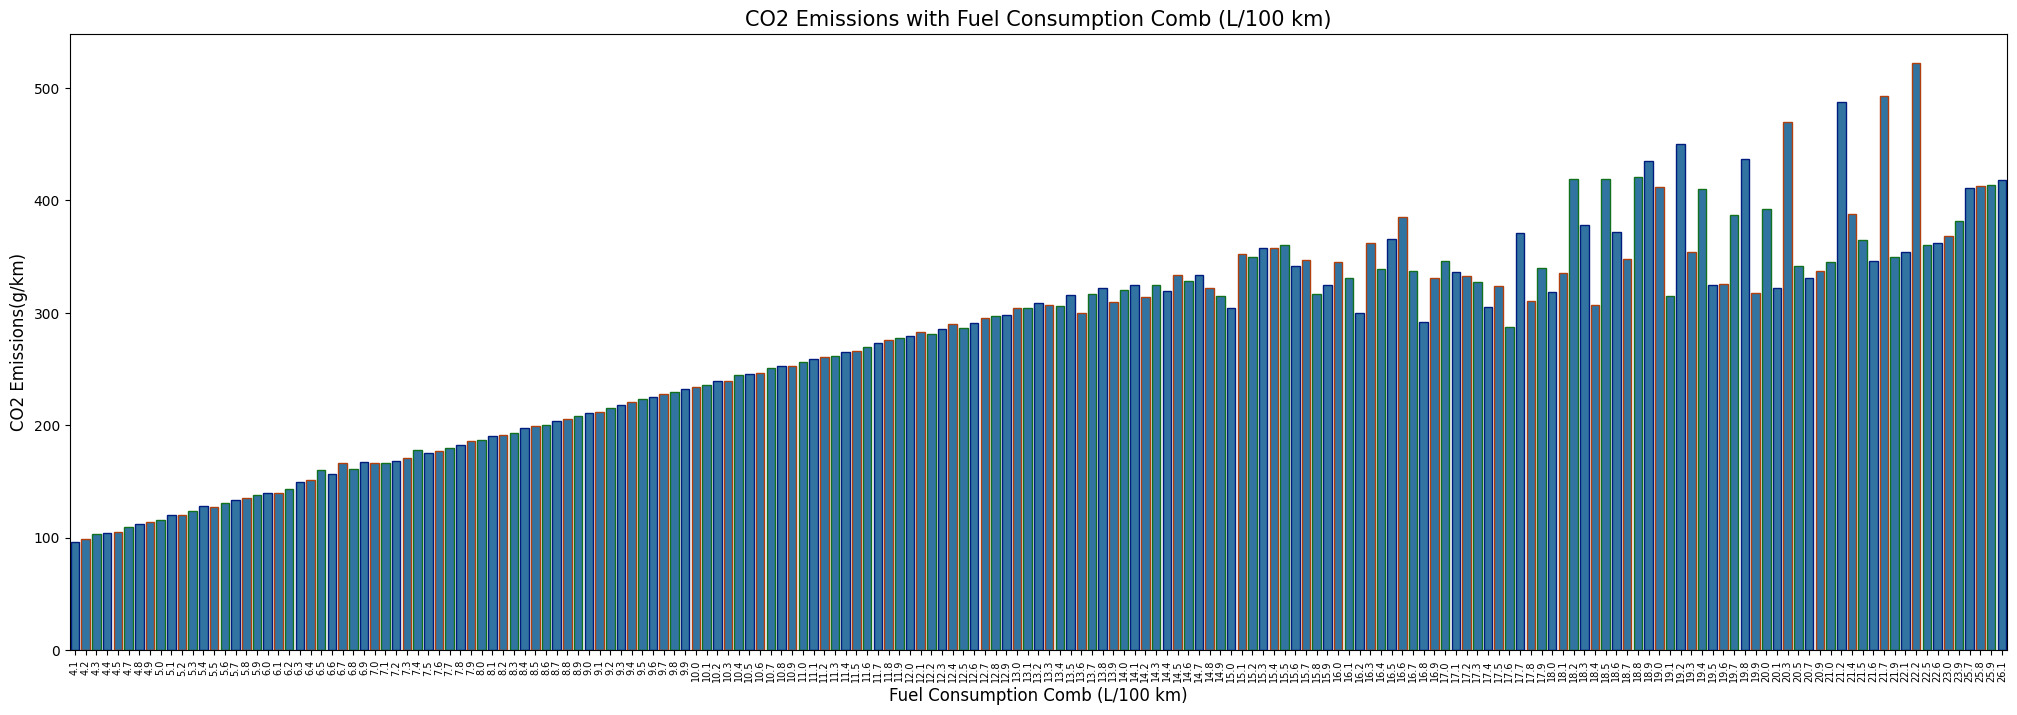

In [68]:
CO2_comb = fuel_con.groupby(['Fuel Consumption Comb (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

 1. With the increase in fuel consumption the CO2 emissions also increases.
 2. From the plots we can see almost an linear increase in CO2 emissions with Fuel Consumption, as they are highly postively correlated.
 3. The same trend can be observed in all the three features representing Fuel Consumption in (L/100 km).

#### ***6. Feature : Fuel Consumption Comb (mpg)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

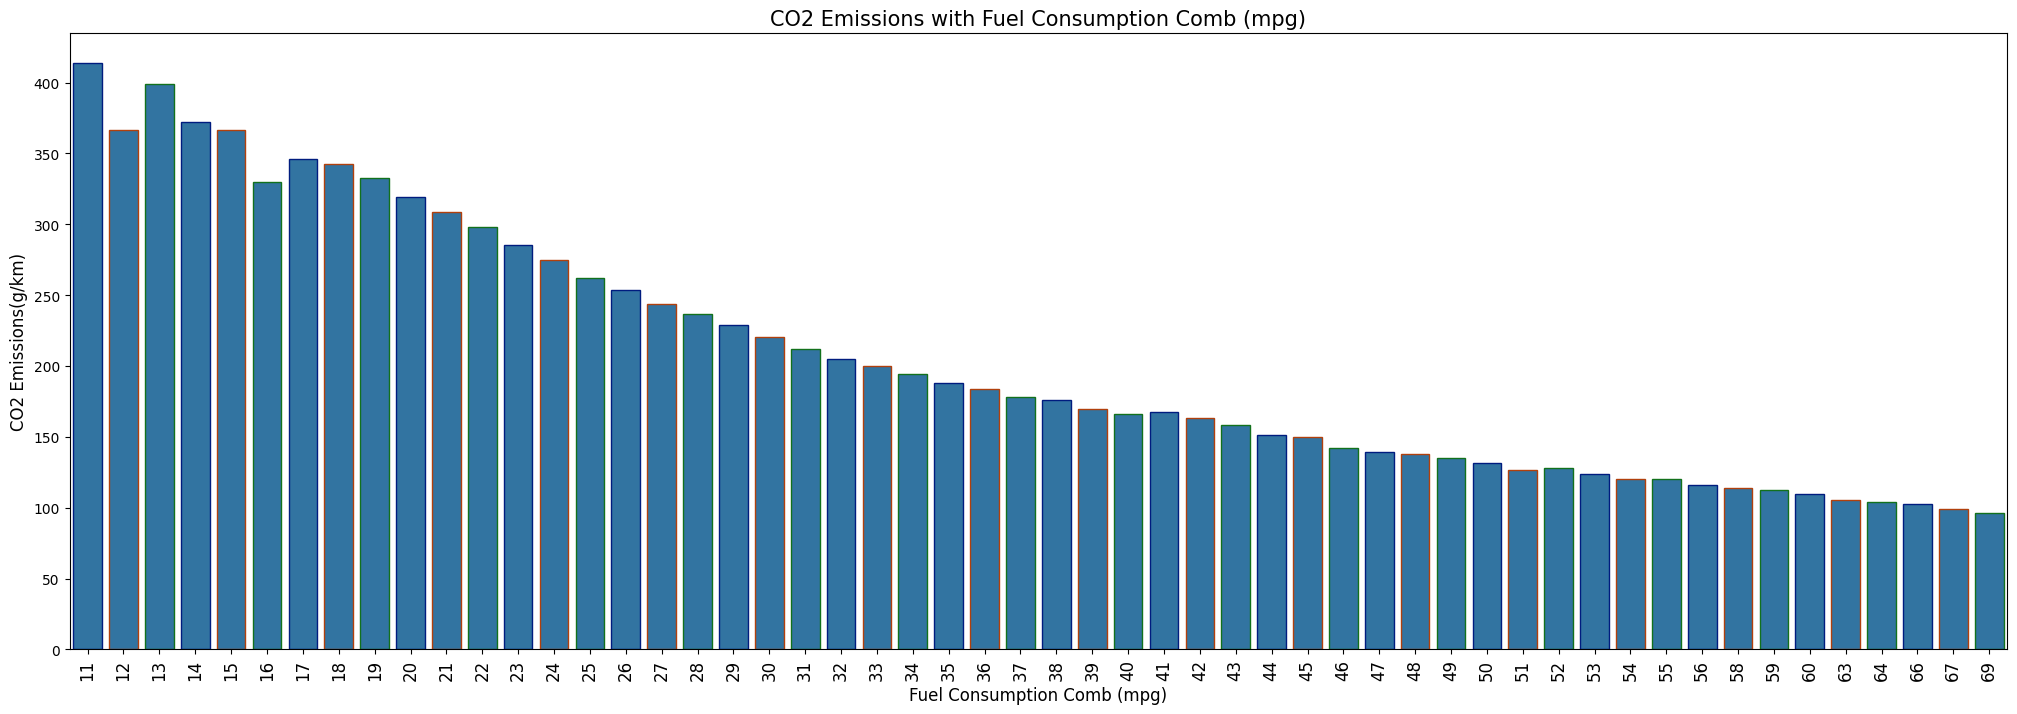

In [69]:
CO2_comb_mpg = fuel_con.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

 1. As infered from the correlation matrix that CO2 Emission and Fuel Consumption Comb(mpg) are strongly negatively correlated.
 2. The feature Fuel Consumption Comb(mpg) shows how many miles a car can go with one gallon of fuel. So less mile per gallon represents more fuel consumption. So it is logical to have negative correlation with CO2 emissions.
 3. So as Fuel Consumption Comb(mpg) decreases, CO2 emissios increases.